In [1]:
# Data wrangling libraries
import numpy as np
import pandas as pd
import os

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Resampling
from imblearn.over_sampling import SMOTE

%matplotlib inline

In [2]:
# modelling
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [42]:
# evaluation metrics libraries
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.metrics import (precision_score, recall_score, f1_score,accuracy_score)

In [4]:
# Construct the directory containing the CSV files
current_dir = os.getcwd()  # Get the current working directory
data_dir = os.path.join(current_dir, '..', 'data') 

# List of file names to read
file_names = ['df_xrf.csv', 'globaL_df.csv']

# Initialize a dictionary to store DataFrames
dataframes = {}

# Loop through the file names, read each file, and store in the dictionary
for file_name in file_names:
    file_path = os.path.join(data_dir, file_name)  # Construct the full file path
    dataframes[file_name] = pd.read_csv(file_path, index_col=0)  # Read the CSV file and store in the dictionary

# Access the DataFrames using their file names
xrf_df = dataframes['df_xrf.csv']
global_df = dataframes['globaL_df.csv']

In [5]:
xrf_df.columns

Index(['sio2', 'tio2', 'al2o3', 'fe2o3', 'mgo', 'cao', 'mno', 'k2o', 'p2o5',
       'rock_type'],
      dtype='object')

In [6]:
global_df.columns

Index(['sample_id', 'rock_name', 'qap_name', 'major_id', 'method_id', 'sio2',
       'tio2', 'al2o3', 'fe2o3', 'mgo', 'cao', 'mno', 'k2o', 'na2o', 'p2o5',
       'rock_type'],
      dtype='object')

In [7]:
X_train = global_df[['sio2', 'tio2', 'al2o3', 'fe2o3', 'mgo', 'cao', 'mno', 'k2o', 'p2o5']]
y_train = global_df['rock_type']

In [8]:
X_xrf = xrf_df.drop('rock_type', axis=1)
y_xrf = xrf_df['rock_type']

In [9]:
smote = SMOTE(random_state=13)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [10]:
# Check the distribution of the classes in the resampled training set:
from collections import Counter
print("Original training set class distribution:", Counter(y_train))
print("Resampled training set class distribution:", Counter(y_train_resampled))

Original training set class distribution: Counter({'granite': 21620, 'diorite': 2952})
Resampled training set class distribution: Counter({'granite': 21620, 'diorite': 21620})


In [11]:
pipelines = {
    'Logistic Regression': Pipeline([
        ('classifier', LogisticRegression(max_iter=1000))
    ]),
    'Random Forest': Pipeline([
        ('classifier', RandomForestClassifier(random_state=13))
    ]),
    'Decision Tree': Pipeline([
        ('classifier', DecisionTreeClassifier(random_state=13))
    ]),
    'KNN': Pipeline([
        ('classifier', KNeighborsClassifier())
    ]),
    'SVM': Pipeline([
        ('classifier', SVC(random_state=13))
    ]),
    'Gradient Boosting': Pipeline([
        ('classifier', GradientBoostingClassifier(random_state=13))
    ])
}

# Train and evaluate each model
for model_name, pipeline in pipelines.items():
    print(f"Evaluating {model_name}...")
    
    # Train the model on the global dataset
    pipeline.fit(X_train_resampled, y_train_resampled)
    
    # Evaluate on the validation set
    predictions = pipeline.predict(X_xrf)
    print(f"Validation Classification Report for {model_name}:")
    print(classification_report(y_xrf, predictions))
    
    # Confusion matrix for validation set
    print(f"Confusion Matrix for {model_name}:")
    print(confusion_matrix(y_xrf, predictions))
    
    # Hyperparameter tuning 
    # Note: You can add hyperparameter tuning as needed for each model
    
    # Final evaluation on the test set with hyperparameter tuning
#     y_test_pred = pipeline.predict(X_test)
#     print(f"Test Classification Report for {model_name}:")
#     print(classification_report(y_test, y_test_pred))
    
#     # Confusion matrix for test set
#     print(f"Confusion Matrix for {model_name}:")
#     print(confusion_matrix(y_test, y_test_pred))
    
    print("------------------------------------------")

Evaluating Logistic Regression...
Validation Classification Report for Logistic Regression:
              precision    recall  f1-score   support

     diorite       0.98      0.11      0.19       560
     granite       0.32      1.00      0.49       238

    accuracy                           0.37       798
   macro avg       0.65      0.55      0.34       798
weighted avg       0.79      0.37      0.28       798

Confusion Matrix for Logistic Regression:
[[ 60 500]
 [  1 237]]
------------------------------------------
Evaluating Random Forest...
Validation Classification Report for Random Forest:
              precision    recall  f1-score   support

     diorite       0.94      0.09      0.16       560
     granite       0.32      0.99      0.48       238

    accuracy                           0.36       798
   macro avg       0.63      0.54      0.32       798
weighted avg       0.76      0.36      0.25       798

Confusion Matrix for Random Forest:
[[ 49 511]
 [  3 235]]
-------

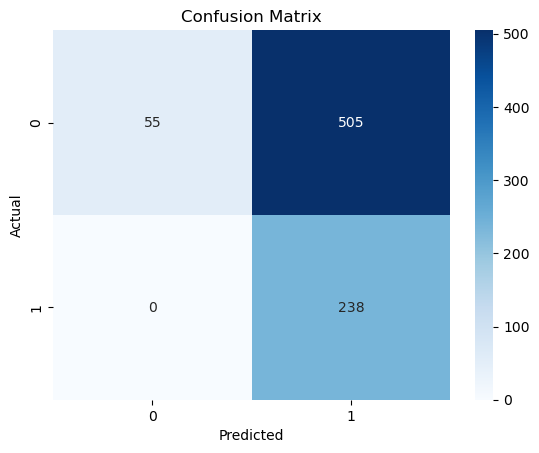

In [36]:
cm = confusion_matrix(y_xrf, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


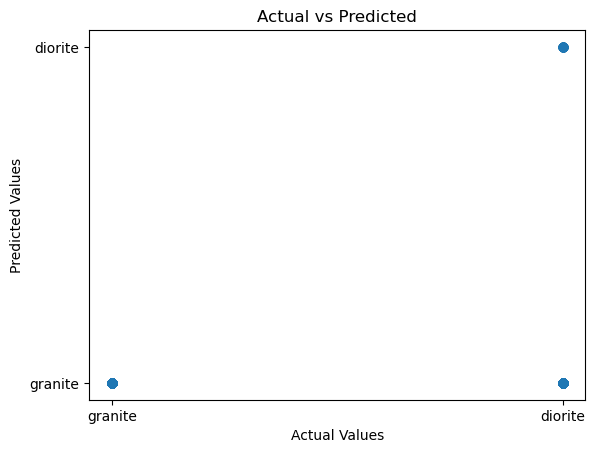

In [46]:
plt.scatter(y_xrf, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()
